# Machine Learning: Machine Learning tools
### Unige

#### Kevin Raymundo Serrano Vilchis 
#### S4539351

![logo](https://www.h2o.ai/wp-content/uploads/2017/11/H2O_platform_logo-1.png)

### Overview

* Introduction H2O
* Architechture
* Setup H2O
* FLOW API (live 'coding')
* H2O using Python (live coding)
* Summary

## Introduction

![Community](https://www.h2o.ai/wp-content/uploads/2016/09/community_hero-1.png)

* Founded in 2011 in Silicon Valley (formerly 0xdata)
* #1 Open-source machine learning platform for enterprises
* The company receives fees for providing customer service and customized extensions.
* Platform:
    * **Parallelized and distributed algorithms** to make the most out of **multithreaded** systems.
    * Easy to use and adopt
    * **Big data** + Better models = Better predictions
* Comcast, Macy's, Cisco, PayPal

## Architecture

![Software](https://www.h2o.ai/wp-content/uploads/2017/11/h2o-architecture-1.png)

* Distributed file systems + stream processing platforms + APIs
* Data stays on DFS, on the API side we get a pointer to the distributed dataset.
* Also possible to actually import it into workspace using data frames.
* They can also interface between other packages like caffe, tensorflow, etc...

## Setup

Prerequisites to launch H2O and Flow
* 64 bit Java 6+

### Flow users
1. Download and unpack h2o zip file from website [link](http://h2o-release.s3.amazonaws.com/h2o/rel-wheeler/4/index.html)
1. Run the following command from terminal 
```
cd ~/Downloads
unzip h2o-3.16.0.4.zip
cd h2o-3.16.0.4
java -jar h2o.jar
```
1. Point your browser to http://localhost:54321

### Python users
1. Prerequisite: Python installed (versions 2.7.x, 3.5.x, 3.6.x)
1. Using pip, install dependencies and h2o
```python
pip install requests
pip install tabulate
pip install scikit-learn
pip install colorama
pip install future
pip install h2o
```
1. Check that library is properly installed:
```python
import h2o
h2o.init(nthreads = -1)
```

### R users
1. Prerequisite: R installed (version 3 or later)
1. Install from cran
```R
 # Download packages that H2O depends on.
pkgs <- c("RCurl","jsonlite")
for (pkg in pkgs) {
if (! (pkg %in% rownames(installed.packages()))) { install.packages(pkg) }
}
# Download, install and initialize the H2O package for R.
install.packages("h2o", type="source", repos="http://h2o-release.s3.amazonaws.com/h2o/rel-wheeler/4/R")
```
1. Check that library is properly installed:
```R
library(h2o)
h2o.init(nthreads = -1)
```

In [36]:
library(h2o)
h2o.init(nthreads = -1)


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpSYutVM/h2o_kevin_started_from_r.out
    /tmp/RtmpSYutVM/h2o_kevin_started_from_r.err


Starting H2O JVM and connecting: ...... Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         4 seconds 690 milliseconds 
    H2O cluster version:        3.16.0.4 
    H2O cluster version age:    21 days, 12 hours and 52 minutes  
    H2O cluster name:           H2O_started_from_R_kevin_ucg080 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.71 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4 
    R Version:                  R version 3.4.2 

## Small demo with MNIST dataset
![MNIST](http://i.ytimg.com/vi/0QI3xgXuB-Q/hqdefault.jpg)

In [37]:
# This step takes a few seconds bc we have to download the data from the internet...
train_file <- "https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/train.csv.gz"
test_file <- "https://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/mnist/test.csv.gz"
train <- h2o.importFile(train_file)
test <- h2o.importFile(test_file)

  |======================================================================| 100%
  |======================================================================| 100%


In [38]:
y <- "C785"                    # response column: digits 0-9
x <- setdiff(names(train), y)  # vector of predictor column names

In [39]:
# Since the response is encoded as integers, we need to tell H2O that
# the response is in fact a categorical/factor column.  Otherwise, it 
# will train a regression model instead of multiclass classification.
train[,y] <- as.factor(train[,y])
test[,y] <- as.factor(test[,y])

In [40]:
dl_fit1 <- h2o.deeplearning(x = x,
                            y = y,
                            training_frame = train,
                            model_id = "dl_fit1",
                            hidden = c(20,20),
                            seed = 1)

Warning message in .h2o.startModelJob(algo, params, h2oRestApiVersion):
“Dropping bad and constant columns: [C86, C85, C729, C728, C646, C645, C169, C760, C561, C53, C11, C55, C10, C54, C57, C12, C56, C58, C17, C19, C18, C731, C730, C20, C22, C21, C24, C23, C26, C25, C28, C27, C702, C701, C29, C700, C1, C2, C784, C3, C783, C4, C782, C5, C781, C6, C142, C7, C141, C8, C9, C31, C30, C32, C759, C758, C757, C756, C755, C477, C113, C674, C112, C673, C672, C84, C83].
”

  |======================================================================| 100%


In [41]:
dl_fit3 <- h2o.deeplearning(x = x,
                            y = y,
                            training_frame = train,
                            validation_frame = test,
                            model_id = "dl_fit3",
                            epochs = 50,
                            sparse = TRUE,
                            hidden = c(128,64),
                            activation = "RectifierWithDropout",
                            input_dropout_ratio = 0.2,
                            hidden_dropout_ratios = c(0.3, 0.2),
                            # nfolds = 0,                            #used for early stopping
                            score_interval = 1,                    #used for early stopping
                            stopping_rounds = 5,                   #used for early stopping
                            stopping_metric = "misclassification", #used for early stopping
                            stopping_tolerance = 1e-3,             #used for early stopping
                            seed = 1)

Warning message in .h2o.startModelJob(algo, params, h2oRestApiVersion):
“Dropping bad and constant columns: [C86, C85, C729, C728, C646, C645, C169, C760, C561, C53, C11, C55, C10, C54, C57, C12, C56, C58, C17, C19, C18, C731, C730, C20, C22, C21, C24, C23, C26, C25, C28, C27, C702, C701, C29, C700, C1, C2, C784, C3, C783, C4, C782, C5, C781, C6, C142, C7, C141, C8, C9, C31, C30, C32, C759, C758, C757, C756, C755, C477, C113, C674, C112, C673, C672, C84, C83].
”

  |======================================================================| 100%


In [42]:
h2o.scoreHistory(dl_fit3)

timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
2018-02-06 10:40:21,0.000 sec,NA,0.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-06 10:40:23,5.174 sec,6317 obs/sec,0.253750,1,15225,0.30846995,0.35114927,0.104126920,0.3010410,0.34552415,0.0987
2018-02-06 10:40:42,24.252 sec,8430 obs/sec,2.774000,11,166440,0.19424629,0.14668798,0.043277437,0.2043801,0.16707430,0.0486
2018-02-06 10:41:00,41.865 sec,8478 obs/sec,5.039917,20,302395,0.16457919,0.10573496,0.032031328,0.1821135,0.13307520,0.0393
2018-02-06 10:41:18,59.743 sec,8483 obs/sec,7.305717,29,438343,0.15242962,0.09199601,0.026508686,0.1718004,0.12143674,0.0343
2018-02-06 10:41:37,1 min 19.028 sec,8515 obs/sec,9.822300,39,589338,0.13839209,0.07676129,0.021990160,0.1669608,0.11887956,0.0318
2018-02-06 10:41:56,1 min 37.269 sec,8634 obs/sec,12.338767,49,740326,0.13011760,0.06848600,0.019680691,0.1627006,0.11287408,0.0308
2018-02-06 10:42:14,1 min 55.516 sec,8562 obs/sec,14.607550,58,876453,0.12271274,0.06113666,0.018274927,0.1575078,0.10971156,0.0283
2018-02-06 10:42:32,2 min 13.183 sec,8679 obs/sec,17.129967,68,1027798,0.11759550,0.05687099,0.015563812,0.1546176,0.10648411,0.0273
2018-02-06 10:42:49,2 min 30.411 sec,8689 obs/sec,19.390667,77,1163440,0.11389628,0.05244103,0.015162165,0.1555310,0.10547621,0.0283


In [43]:
h2o.confusionMatrix(dl_fit3)

,0,1,2,3,4,5,6,7,8,9,Error,Rate
0,998,0,0,0,0,0,1,0,0,0,0.001001001,1 / 999
1,0,1095,2,1,0,0,0,1,0,0,0.003639672,"4 / 1,099"
2,2,0,978,0,2,0,0,1,1,0,0.006097561,6 / 984
3,0,0,3,1030,0,2,0,1,5,5,0.015296367,"16 / 1,046"
4,0,1,0,0,935,0,0,0,0,4,0.005319149,5 / 940
5,2,0,0,6,0,916,1,0,0,1,0.010799136,10 / 926
6,1,1,0,0,0,0,1019,0,0,0,0.001958864,"2 / 1,021"
7,1,0,3,0,0,0,0,982,0,2,0.006072874,6 / 988
8,1,2,0,3,0,4,0,1,963,2,0.013319672,13 / 976
9,2,1,0,1,4,2,0,2,4,964,0.016326531,16 / 980


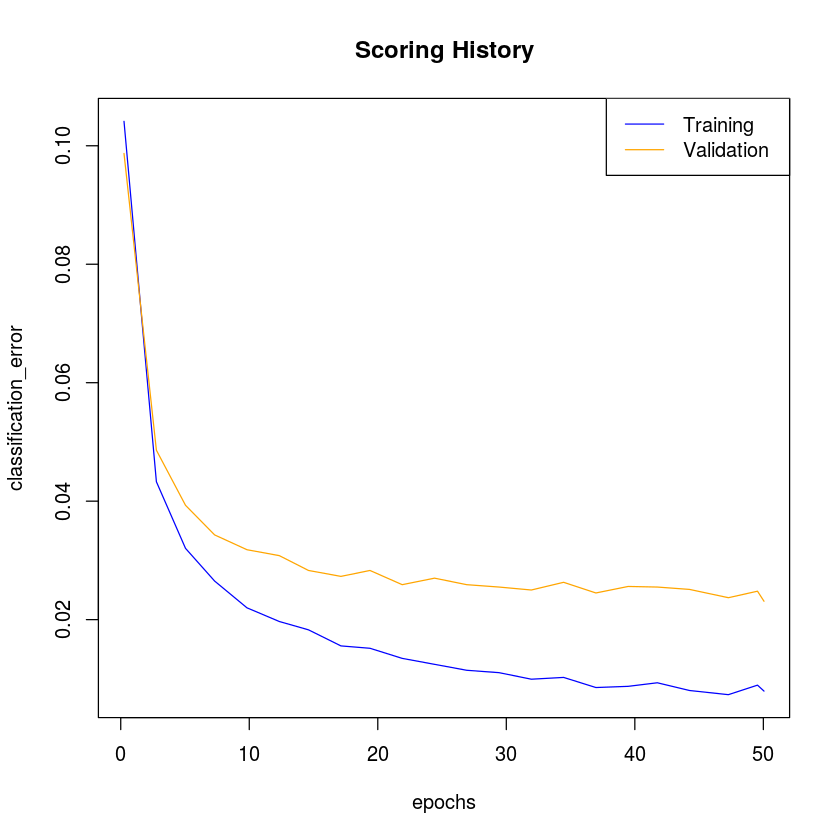

In [44]:
plot(dl_fit3, 
     timestep = "epochs", 
     metric = "classification_error")

## Sumary

* H2O is easy to use
* Off-the-shelf algorithms
* FLOW API is targeted to users who prefer GUIs or have basic coding experience
* Extern libraries/packages can be added by using Python and R
    * Data analysis and pre-processing

In [45]:
h2o.shutdown()

Are you sure you want to shutdown the H2O instance running at http://localhost:54321/ (Y/N)? Y


[1] TRUE